In [2]:
import numpy as np
import ROOT
from matplotlib import pyplot as plt

Welcome to JupyROOT 6.18/04


In [2]:
ana = np.load('/data_fast/hye/lab_framework_backup/run3239/analysis.npy').item()
print ana.keys()

print ana['snr_mpv_fitresults']['H1041']
print ana['multi_pixel_cluster_charge_fit']['H1041']
print ana['multi_pixel_cluster_charge_fit']['H2051']

['mpv_sectors_fitresults', 'cluster_charge_histogram', 'noise_median', 'snr_mpv_sectors_fitresults', 'cluster_median', 'cluster_charge_fit', 'multi_pixel_cluster_charge_fit', 'mpv_sectors', 'mpv_fitresults', 'snr_mpv', 'noise_sectors_median', 'noise', 'snr_mpv_sectors', 'noise_sectors', 'multi_pix_cluster_charge_histogram', 'noise_max', 'mpv', 'multi_pix_cluster_median', 'snr', 'multi_pix_mpv', 'snr_mpv_fitresults', 'noise_sectors_max', 'snr_histogram', 'multi_pix_mpv_fitresults', 'single_pix_cluster_charge_histogram']
{'constant': 208473.08109039807, 'mpv_error': 0.04112835233093648, 'chi2': 52.261921673308464, 'constant_error': 309.04137869601016, 'ndf': 28L, 'mpv': 48.02036434797099, 'sigma_error': 0.05745627712128076, 'sigma': 11.158730938209317}
{70: {'constant': 175953.84806747022, 'mpv_error': 0.03274476195108633, 'chi2': 3495.1454376995516, 'constant_error': 223.53668171613955, 'ndf': 48L, 'mpv': 41.42956431086866, 'sigma_error': 0.0285500595155721, 'sigma': 12.27330584229953}}

H1041 175953.848067 41.4295643109 12.2733058423
H2051 175953.848067 41.4295643109 12.2733058423
 FCN=953.04 FROM MIGRAD    STATUS=CONVERGED      96 CALLS          97 TOTAL
                     EDM=3.07554e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   5.8 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.57378e+05   2.24557e+02  -3.39716e+00   3.29445e-06
   2  MPV          4.46982e+01   3.32674e-02   1.03884e-04  -2.74782e-02
   3  Sigma        1.24372e+01   3.47967e-02   1.45429e-05   9.61194e-01
 FCN=1642.61 FROM MIGRAD    STATUS=CONVERGED     111 CALLS         112 TOTAL
                     EDM=2.48555e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.37107e+05   2.05303e+02  -5.25695e-01

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


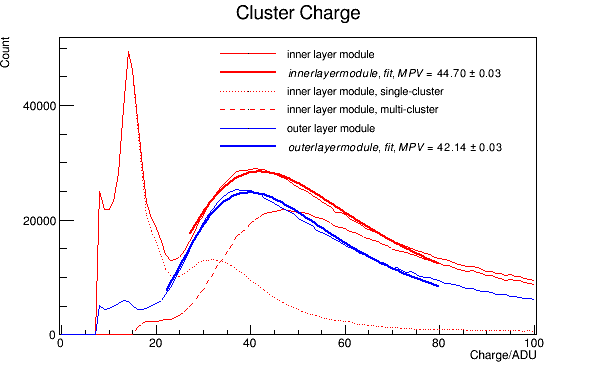

In [7]:
##plot cluster charge

cc_histos = ana['cluster_charge_histogram']
cc_single = ana['single_pix_cluster_charge_histogram']
cc_multi = ana['multi_pix_cluster_charge_histogram']

form = {}
form_key = 'multi_pixel_cluster_charge_fit'

dhes=['H1041','H2051']
label=['inner layer module','outer layer module']
color=[2,4]

#ROOT.gROOT.FindObject('c0')

c0 = ROOT.TCanvas('c0','c0',600,400)

ROOT.gStyle.SetOptStat(0)

leg0=ROOT.TLegend(0.35,0.58,0.88,0.88)
leg0.SetBorderSize(0);
leg0.SetFillColor(0);

def format_hist(hist, color, width=1, style=1):
    hist.GetXaxis().SetRangeUser(0,100)
    hist.GetXaxis().SetTitle('Charge/ADU')
    hist.GetYaxis().SetTitle('Count')
    hist.GetYaxis().SetNdivisions(505)
    hist.SetTitle('Cluster Charge')
    hist.SetLineColor(color)
    hist.SetLineWidth(width)
    hist.SetLineStyle(style)

f1 = ROOT.TF1('f1','landau',10,90)
f2 = ROOT.TF1('f2','landau',10,90)
f2.SetLineColor(4)

for idx, dhe in enumerate(dhes):

    #hist = ROOT.TH1F(snr_histos[dhe])
    format_hist(cc_histos[dhe], color[idx])
    format_hist(cc_single[dhe], color[idx],style=3)
    format_hist(cc_multi[dhe], color[idx],style=7)
    
    leg0.AddEntry(cc_histos[dhe], label[idx])
                  
    form[dhe] = ROOT.TF1('f1','landau',20,80)
    print dhe, ana[form_key][dhe][70]['constant'],\
                     ana[form_key][dhe][70]['mpv'],\
                     ana[form_key][dhe][70]['sigma']
            
    form[dhe].SetParameters(ana[form_key][dhe][70]['constant'],
                     ana[form_key][dhe][70]['mpv'],
                     ana[form_key][dhe][70]['sigma'])
    form[dhe].SetLineColor(color[idx])
    form[dhe].SetLineWidth(3)
    #form[dhe].SetLineStyle(3)
    #leg0.AddEntry(form[dhe],'%s fit'%label[idx],'l')


    if idx==0:
        #cc_histos[dhe].DrawCopy('l')
        cc_histos[dhe].Fit(f1,'','l',27,80)
        leg0.AddEntry(f1, '%s, fit, MPV = %.2f\pm%.2f'%(label[idx],f1.GetParameter(1),f1.GetParError(1)),'l')


    #    hist.Fit(f1,'','',32,90)
        cc_single[dhe].DrawCopy('lsame')
        cc_multi[dhe].DrawCopy('lsame')
        #form[dhe].DrawCopy('same')
        
        leg0.AddEntry(cc_single[dhe], '%s, single-cluster'%label[idx])
        leg0.AddEntry(cc_multi[dhe], '%s, multi-cluster'%label[idx])

    else:
        cc_histos[dhe].Fit(f2,'','lsame',22,80)
        leg0.AddEntry(f2, '%s, fit, MPV = %.2f\pm%.2f'%(label[idx],f2.GetParameter(1),f2.GetParError(1)),'l')

        #cc_histos[dhe].DrawCopy('lsame')
        #form[dhe].DrawCopy('same')

#leg0.Draw()
c0.Draw()
leg0.Draw()
c0.Update()

['cluster_charge_histogram', 'noise_median', 'snr_mpv_sectors_fitresults', 'cluster_median', 'cluster_charge_fit', 'multi_pixel_cluster_charge_fit', 'snr_histogram_multi', 'snr_histogram_single', 'mpv_fitresults', 'snr_mpv', 'noise_sectors_median', 'noise', 'snr_mpv_sectors', 'noise_sectors', 'multi_pix_cluster_charge_histogram', 'noise_max', 'mpv', 'multi_pix_cluster_median', 'snr', 'multi_pix_mpv', 'snr_mpv_fitresults', 'noise_sectors_max', 'snr_histogram', 'multi_pix_mpv_fitresults', 'single_pix_cluster_charge_histogram']
Name: H1041_snr_single Title:  NbinsX: 201
H1041
H2051


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


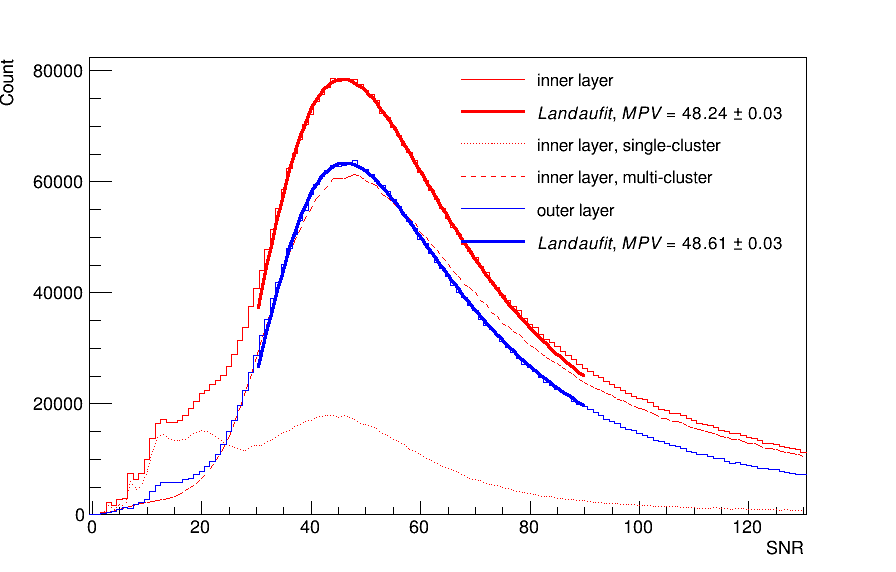

In [38]:
##plot SNR

#ana = np.load('/data_fast/hye/lab_framework_backup/run3239_2/analysis.npy').item()
ana = np.load('/data_fast/hye/lab_framework_backup/run3138_2/analysis.npy').item()

print ana.keys()

snr_histos = ana['snr_histogram']
snr_single = ana['snr_histogram_single']
snr_multi = ana['snr_histogram_multi']

print snr_single['H1041']

dhes=['H1041','H2051']
label=['inner layer','outer layer']
color=[2,4]

c1 = ROOT.TCanvas('c1','c1',900,600)
ROOT.gStyle.SetOptStat(0)

def format_hist(hist, color, width=1, style=1):
    hist.GetXaxis().SetRangeUser(0,130)
    hist.GetXaxis().SetTitle('SNR')
    hist.GetYaxis().SetTitle('Count')
    hist.GetYaxis().SetNdivisions(505)
    #hist.SetTitle('Cluster Signal to Noise ratio')
    hist.SetLineColor(color)
    hist.SetMarkerColor(color)
    hist.SetLineWidth(width)
    hist.SetLineStyle(style)

leg1=ROOT.TLegend(0.5,0.55,0.9,0.89)
leg1.SetBorderSize(0);
leg1.SetFillStyle(0);

form={}
for idx, dhe in enumerate(dhes):

    #hist = ROOT.TH1F(snr_histos[dhe])
    format_hist(snr_histos[dhe], color[idx])
    format_hist(snr_single[dhe], color[idx],style=3)
    format_hist(snr_multi[dhe], color[idx],style=7)
    
    leg1.AddEntry(snr_histos[dhe], label[idx])
    
    form[dhe] = ROOT.TF1('f1','landau',30,90)
    form[dhe].SetParameters(ana['snr_mpv_fitresults'][dhe]['constant'],
                     ana['snr_mpv_fitresults'][dhe]['mpv'],
                     ana['snr_mpv_fitresults'][dhe]['sigma'])
    form[dhe].SetLineColor(color[idx])
    form[dhe].SetLineWidth(3)
    #form[dhe].SetLineStyle(3)
    leg1.AddEntry(form[dhe],'Landau fit, MPV=%.2f\pm%.2f'%(ana['snr_mpv_fitresults'][dhe]['mpv'],ana['snr_mpv_fitresults'][dhe]['mpv_error']),'l')
    #leg1.AddEntry(form[dhe],'%s, landau fit'%label[idx],'l')


    print dhe
    if idx==0:
        #snr_histos[dhe].GetYaxis().SetRangeUser(0,45000)
        snr_histos[dhe].DrawCopy()
    #    hist.Fit(f1,'','',32,90)
        snr_single[dhe].DrawCopy('lsame')
        snr_multi[dhe].DrawCopy('lsame')
        
        leg1.AddEntry(snr_single[dhe], '%s, single-cluster'%label[idx])
        leg1.AddEntry(snr_multi[dhe], '%s, multi-cluster'%label[idx])
    else:
        snr_histos[dhe].DrawCopy('same')

    form[dhe].DrawCopy('same')


#leg1.Draw()
c1.Draw()
leg1.Draw()
#c1.Update()

In [ ]:
f1 = ROOT.TF1('f1','landau',30,90)
f1.SetParameter(0,ana['snr_mpv_fitresults'][dhe]['constant'])
f1.SetParameter(1,ana['snr_mpv_fitresults'][dhe]['mpv'])
f1.SetParameter(2,ana['snr_mpv_fitresults'][dhe]['sigma'])

c2 = ROOT.TCanvas('c2','c2',500,300)
ROOT.gStyle.SetOptStat(0)
f1.Draw()
c2.Draw()

In [ ]:
f = ROOT.TFile('snr_histo_exp10run3239.root','recreate')
for dhe, hist in ana['snr_histogram'].iteritems():
    hist.Write()

for dhe, hist in ana['cluster_charge_histogram'].iteritems():
    hist.Write()
    
for dhe, hist in ana['multi_pix_cluster_charge_histogram'].iteritems():
    hist.Write()
    
for dhe, hist in ana['single_pix_cluster_charge_histogram'].iteritems():
    hist.Write()
    
f.Write()
f.ls()
f.Close()


In [ ]:
f = ROOT.TFile('snr_histo_exp10run3239.root','read')
f.ls()

# Compare cluster charge under different clear on voltages

In [3]:
import numpy as np
import ROOT
from matplotlib import pyplot as plt
import os


In [15]:
def format_cchist(hist, color, title='', width=2, style=1):
    hist.GetXaxis().SetRangeUser(0,200)
    hist.GetXaxis().SetTitle('Charge/ADU')
    hist.GetYaxis().SetTitle('Count')
    hist.GetYaxis().SetNdivisions(505)
    hist.SetTitle(title)
    hist.SetLineColor(color)
    hist.SetLineWidth(width)
    hist.SetLineStyle(style)
    
def format_cs(hist, color, width=2, style=1):
    hist.GetXaxis().SetRangeUser(0,20)
    hist.GetYaxis().SetTitle('Count')
    hist.GetYaxis().SetNdivisions(505)
    hist.SetTitle('Cluster Size')
    hist.SetLineColor(color)
    hist.SetLineWidth(width)
    hist.SetLineStyle(style)

In [16]:
#runs = [5179,798,950,1150,1333,1742]
volt = [19,17,16,15,14,13]

runs = [1558,1580,2153,2182,2223]
color = [1,2,4,6,8,38]

#subfolder = 'lower_clear-on_performance'
subfolder = 'SR_202003'

dhes = [
                '1012','1082','1022','2042',
                '1062','1072','2052','1042','1052',
                '1071','1061','2051','1041','1051',
                '1011','1031','1081','2041','1021'
]
dhes = ['H%s'%dhe for dhe in dhes]


ccs = ['multi_pix_cluster_charge_histogram',
       'single_pix_cluster_charge_histogram',
       'cluster_charge_histogram',
       'seed_charge_histogram']

#cc = 'cluster_size'

anas = [np.load(os.path.join('/data_fast/hye/lab_framework_backup','run%04i'%run,'analysis.npy')).item() for run in runs]

print anas[0].keys()


#for dhe in dhes:
#    c= ROOT.gROOT.FindObject('c_%s'%dhe)
#    print c, type(c)
#    #del ROOT.gROOT.FindObject('c_%s'%dhe)
    
canvas = {dhe:ROOT.TCanvas('c_%s'%dhe,'c_%s'%dhe,600,400) for dhe in dhes }
#canvas = {dhe:ROOT.gROOT.FindObject('c_%s'%dhe) for dhe in dhes}

ROOT.gStyle.SetOptStat(0)

if not os.path.isdir(subfolder):
    os.mkdir(subfolder)

for dhe in dhes:
    
    if not os.path.isdir(os.path.join(subfolder,dhe)):
        os.mkdir(os.path.join(subfolder,dhe))
    
    for cc in ccs:
        leg0=ROOT.TLegend(0.7,0.6,0.88,0.88)
        leg0.SetBorderSize(0);
        leg0.SetFillColor(0);
        
        canvas[dhe].cd()
        
        max_y=0
        imax_y=0
        for i, run in enumerate(runs):
            format_cchist(anas[i][cc][dhe],color[i],cc)
            #format_cs(anas[i][cc][dhe],color[i])
            
            if max_y<anas[i][cc][dhe].GetMaximum():
                max_y=anas[i][cc][dhe].GetMaximum()
                imax_y=i
                
            #leg0.AddEntry(anas[i][cc][dhe],'%iV'%volt[i])
            leg0.AddEntry(anas[i][cc][dhe],'run%s'%run)
            
        anas[0][cc][dhe].GetYaxis().SetRange(1,int(1.1*max_y))
        
        anas[imax_y][cc][dhe].DrawCopy('l')
        for i, run in enumerate(runs):
            if i != imax_y:
                anas[i][cc][dhe].DrawCopy('lsame')
        
        leg0.Draw()
        #canvas[dhe].SetLogy(True)
        canvas[dhe].Update()
        #canvas[dhe].Draw()
        canvas[dhe].SaveAs(os.path.join(subfolder,dhe,'%s_%s.png'%(dhe,cc)))
    



['cluster_charge_histogram', 'noise_median', 'snr_mpv_sectors_fitresults', 'cluster_median', 'cluster_charge_fit', 'multi_pixel_cluster_charge_fit', 'snr_histogram_multi', 'snr_histogram_single', 'mpv_fitresults', 'snr_mpv', 'noise_sectors_median', 'noise', 'snr_mpv_sectors', 'noise_sectors', 'multi_pix_cluster_charge_histogram', 'noise_max', 'mpv', 'multi_pix_cluster_median', 'seed_charge_histogram', 'multi_pix_mpv', 'snr_mpv_fitresults', 'noise_sectors_max', 'snr_histogram', 'cluster_size', 'snr', 'multi_pix_mpv_fitresults', 'single_pix_cluster_charge_histogram']


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H1012
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H1082
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H1022
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H2042
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H1062
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H1072
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H2052
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H1042
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H1052
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H1071
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H1061
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H2051
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_H1041
Warning in <TCanvas::Cons